In [1]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Alexi Semiz - Yannis Laaroussi - Fabio Palmisano - Vincent Roh -*-
# -*- date : 2023-11-03 -*-
# -*- Last revision: 2023-11-03 -*-
# -*- python version : 3.12.0 -*-
# -*- Description: Functions used to save and load pickle datas -*-

In [65]:
import pandas as pd
import numpy as np
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
import powerlaw

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%reload_ext autoreload

In [4]:
from read_functions import *
from pickle_functions import *

In [5]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'

contries_path = '../datas/countries/countries.csv'


In [6]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [7]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users']

### import datas 

### Import datas stored as pickle

In [9]:
df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


## Analysis of the number of user per country

In [10]:
Advocate_users_per_country = deepcopy(pd.DataFrame(df_advocate_users.groupby('location')['user_id'].count()))
Advocate_users_per_country.columns = ['nb_users']
Advocate_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)
Advocate_users_per_country[Advocate_users_per_country.index.str.startswith('United States')].agg('sum')

Advocate_users_per_country.loc['United States', 'nb_users'] = Advocate_users_per_country[
    Advocate_users_per_country.index.str.startswith('United')
]['nb_users'].sum()
Advocate_users_per_country.drop(labels=Advocate_users_per_country[Advocate_users_per_country.index.str.startswith('United States,')].index, inplace=True)
Advocate_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)    

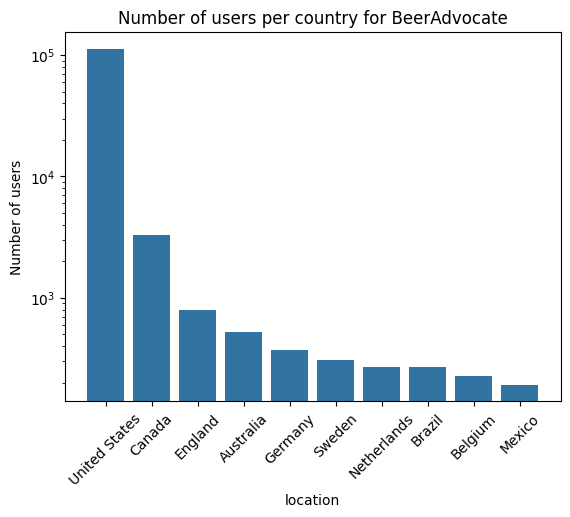

In [11]:
sns.barplot(x=Advocate_users_per_country.index[:10], y=Advocate_users_per_country['nb_users'][:10])
plt.title('Number of users per country for BeerAdvocate')
plt.ylabel('Number of users')
plt.semilogy()
plt.xticks(rotation=45)
plt.show()

In [12]:
rate_beer_users_per_country = deepcopy(pd.DataFrame(df_rate_beer_users.groupby('location')['user_id'].count()))
rate_beer_users_per_country.columns = ['nb_users']
rate_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)

rate_beer_users_per_country.loc['United States', 'nb_users'] = rate_beer_users_per_country[
    rate_beer_users_per_country.index.str.startswith('United')
]['nb_users'].sum()
rate_beer_users_per_country.drop(labels=rate_beer_users_per_country[rate_beer_users_per_country.index.str.startswith('United States,')].index, inplace=True)
rate_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)   

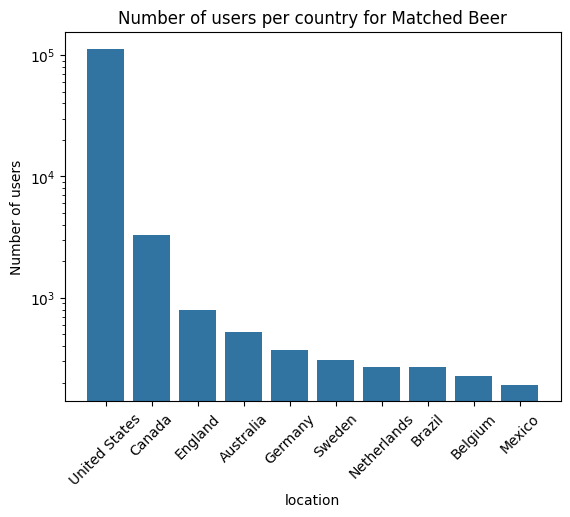

In [13]:
sns.barplot(x=Advocate_users_per_country.index[:10], y=Advocate_users_per_country['nb_users'][:10])
plt.title('Number of users per country for Matched Beer')
plt.ylabel('Number of users')
plt.semilogy()
plt.xticks(rotation=45)
plt.show()

In [14]:
df_matched_beer_users_per_country = deepcopy(df_matched_beer_users.loc[1:,['ba.1','ba.4']])
df_matched_beer_users_per_country.set_index('ba.1', inplace=True)
df_matched_beer_users_per_country.rename_axis('country', inplace=True)
df_matched_beer_users_per_country.columns = ['nb_users']
df_matched_beer_users_per_country = pd.DataFrame(df_matched_beer_users_per_country.groupby('country')['nb_users'].count())
df_matched_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)
df_matched_beer_users_per_country.loc['United States', 'nb_users'] = df_matched_beer_users_per_country[
    df_matched_beer_users_per_country.index.str.startswith('United')
]['nb_users'].sum()
df_matched_beer_users_per_country.drop(labels=df_matched_beer_users_per_country[df_matched_beer_users_per_country.index.str.startswith('United States,')].index, inplace=True)
df_matched_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)   

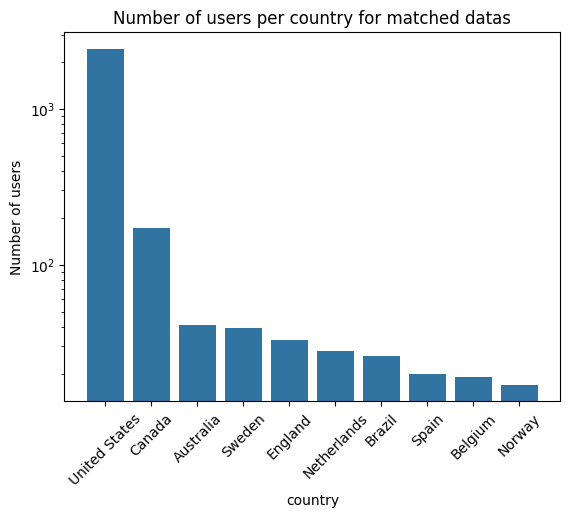

In [15]:
sns.barplot(x=df_matched_beer_users_per_country.index[:10], y=df_matched_beer_users_per_country['nb_users'][:10])
plt.title('Number of users per country for matched datas')
plt.ylabel('Number of users')
plt.semilogy()
plt.xticks(rotation=45)
plt.show()

## Analysis of the number of ratings per user
### Beer Advocate

In [43]:
df_advocate_users.columns

Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')

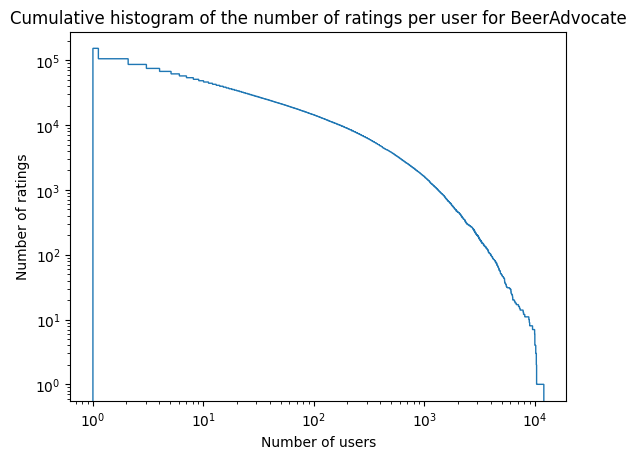

In [42]:
plt.hist(data=df_advocate_users, x='nbr_ratings', bins=100000, cumulative=-1, histtype='step')
plt.title('Cumulative histogram of the number of ratings per user for BeerAdvocate')
plt.xlabel('Number of users')
plt.ylabel('Number of ratings')
plt.loglog()
plt.show()

In [75]:
fit = powerlaw.Fit(df_advocate_users['nbr_ratings'].values)

print('alpha =', fit.alpha)

# R: loglikelihood ratio of the two distributions if positive the first distribution is better
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('R =', R)
print('p =', p)

Calculating best minimal value for power law fit
alpha = 3.0597838418854195
R = 1.7371193143601138
p = 0.0823661128345653


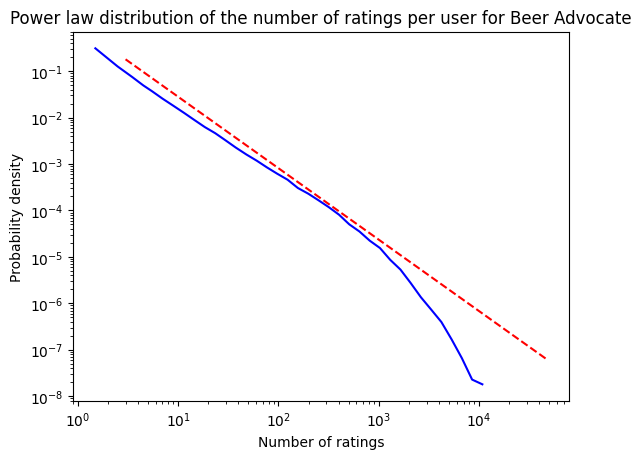

In [83]:
powerlaw.plot_pdf(df_advocate_users['nbr_ratings'].values, color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')

plt.title('Power law distribution of the number of ratings per user for Beer Advocate')
plt.xlabel('Number of ratings')
plt.ylabel('Probability density')
plt.show()

### Rate Beer

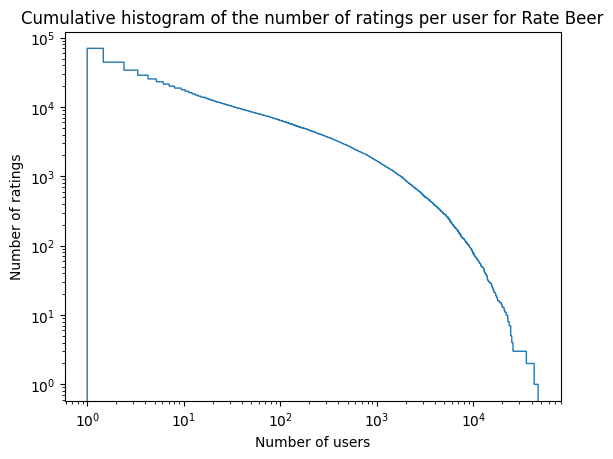

In [77]:
plt.hist(data=df_rate_beer_users, x='nbr_ratings', bins=100000, cumulative=-1, histtype='step')
plt.title('Cumulative histogram of the number of ratings per user for Rate Beer')
plt.xlabel('Number of users')
plt.ylabel('Number of ratings')
plt.loglog()
plt.show()

In [78]:
fit = powerlaw.Fit(df_rate_beer_users['nbr_ratings'].values)

print('alpha =', fit.alpha)

# R: loglikelihood ratio of the two distributions if positive the first distribution is better
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('R =', R)
print('p =', p)

Calculating best minimal value for power law fit
alpha = 1.5388512306661761
R = 81.0874826305118
p = 0.0


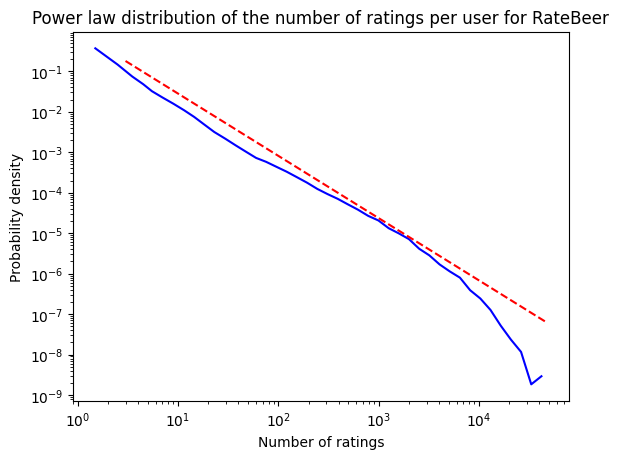

In [79]:
powerlaw.plot_pdf(df_rate_beer_users['nbr_ratings'].values, color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')

plt.title('Power law distribution of the number of ratings per user for RateBeer')
plt.xlabel('Number of ratings')
plt.ylabel('Probability density')
plt.show()

## Store dataFrame into picke format

In [ ]:
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)

Saving df_rate_beer_beers...
Saving df_rate_beer_breweries...
Saving df_rate_beer_users...
Saving df_matched_beer_beers...
Saving df_matched_beer_breweries...
Saving df_matched_beer_ratings_ba...
Saving df_matched_beer_ratings_rb...
Saving df_matched_beer_ratings...
Saving df_matched_beer_users_approx...
Saving df_matched_beer_users...
